# Coding Challenge

Each of the following assignments have a number (integer) as an answer. Please provide this number in the “answer” box and the code used to get the number in the “code” box. The code does not have to run. Python is recommended, but other languages are okay too. If you’re not able to get answer, don’t worry about it, just provide the code and an explanation (as a comment in the code) of what you tried. If you don’t use Python, write the language the code is in as a comment on the first line.

## Code Assignment 1

The following link has a scrambled image Y of a grayscale image X. Image X has a number. Here are some facts:

- Image X was scrambled in Python 2.7 using the Mersenne Twister random number generator seeded with the number 2.
- We used the numpy flatten() function to flatten the 2D image into a 1D array.
- We used the random.shuffle(...) function (not the numpy one) to shuffle a list of numbers [0, 1, 2, …, n-1] where n is the number of pixels in image X.
- The shuffled list was used to assign the pixels in the scrambled image like Y[i] = X[shuffled[i]] for all i in [0, 1, 2, …, n-1].
- Tell us, what's the number in image X? If the unscrambled image is noisy, don't worry about it, as long as you can see the number.

In [1]:
# importing libraries required
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
RANDOM_SEED = 2

In [2]:
%matplotlib inline

### Test run for assignment 1

This run doesn't include the data provided. It implements scrambling and unscrambling, so makes sure everything's working just fine.

In [3]:
# creating the vector and shuffling it
n = 100
vector = range(0, n)
random.seed(RANDOM_SEED)
random.shuffle(vector)

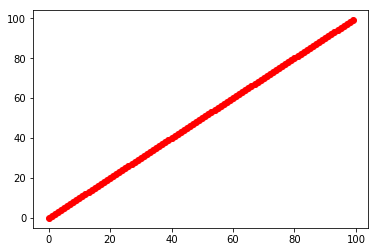

In [4]:
# creating the numpy array
x = np.arange(0, n)
plt.plot(range(0,n), x, 'ro')
plt.show()

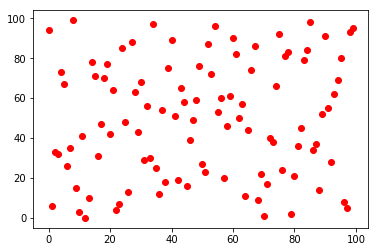

In [5]:
# generating the shuffled array
y = x[vector]
plt.plot(range(0,n), y, 'ro')
plt.show()

In [6]:
# unscrambling the data and storing in y
z = -1*np.ones(n)
# This chunk of code unshuffles vector and stores in y
for index,originalIndex in enumerate(vector):
    z[originalIndex] = y[index]
    
print z

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]


As you can see, the original data was reconstructed reasonably well.

### Main run for assignment 1

This run uses the data provided.

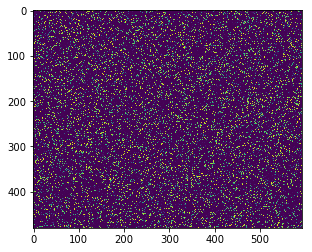

In [7]:
# Loading the image and plotting it
y_img = mpimg.imread('mystery_number_scrambled.jpg')
imgplot = plt.imshow(y_img)

In [8]:
# Flattening the image into 1D array
y_img_flatten = y_img.flatten()

In [9]:
# Finding length of flattened image
n = len(y_img_flatten)
print "Length of flattened image: ", n

Length of flattened image:  284160


In [10]:
# Creating the suffled vector
random.seed(RANDOM_SEED)
vector = range(0, n)
random.shuffle(vector)

In [11]:
# Unscrambling the data
z_flat = -1*np.ones(n)
for index,originalIndex in enumerate(vector):
    z_flat[originalIndex] = y_img_flatten[index]

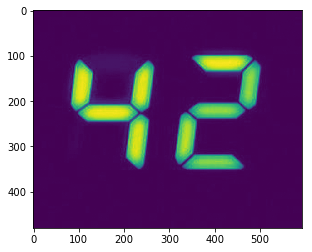

In [12]:
# Converting it back to 2D image and plotting the result
z_img = z_flat.reshape(480, -1)
imgplot = plt.imshow(z_img)

## Coding challenge 2

The following is a CSV file containing a list of of 137 points along the perimeter of a circle. The (x,y) positions of the points are rounded to 2 decimal places. All points are listed in clockwise order except one. The CSV file contains 3 columns: point_id, point_x, point_y. What is the point_id of the one point that is not listed clockwise?

In [20]:
from numpy import genfromtxt
from scipy.ndimage.interpolation import shift


In [33]:
# Extracting the coordinates.
my_data = genfromtxt('circle.csv', delimiter=',', skip_header =1)
x_vals = my_data[:,1]
y_vals = my_data[:,2]

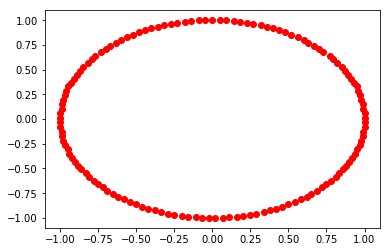

In [34]:
# Plotting to make sure it's a circle
plt.plot(my_data[:,2], my_data[:,1], 'ro')
plt.show()

In [62]:
#Finding the second order gradient
d2x = np.gradient(np.gradient(x_vals))
d2y = np.gradient(np.gradient(y_vals))

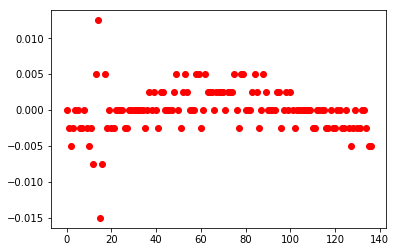

In [63]:
plt.plot(d2x, 'ro')

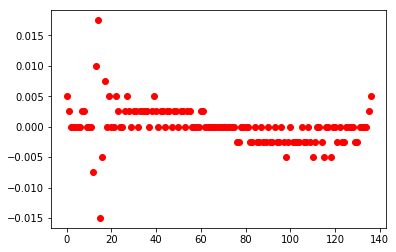

In [64]:
plt.plot(d2y, 'ro')

In [66]:
# Findign location of max 2nd order gradient
print np.argmax(d2x)+1
print np.argmax(d2y)+1

15
15
